In [1]:
pwd

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (8,7)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [4]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
import XCrTools as tools
omega0 = 12800.0

xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_No-ThermalBump.yaml', omega0)
xtools = tools.XCrTools(xcr)



In [5]:
pwd

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples'

In [6]:
U1file = 'run_omega_U1_17_42_C400_9831eV-No-Bump.npy'
U2file = 'run_omega_U2_17_42_C400_9831eV-No-Bump.npy'
w_sim_file='C400_9831eV-No-Bumpw_sim.npy'

U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)
w_sim=np.load(w_sim_file)

In [7]:
coeff = 2.0 * np.pi * xcr.hbar
dni=-2*w_sim[0]/coeff/(w_sim.size-1)
dni,
ntmax=1/dni

In [8]:
IJ=150

Text(0, 0.5, '$\\Delta \\omega/\\omega$ (eV)')

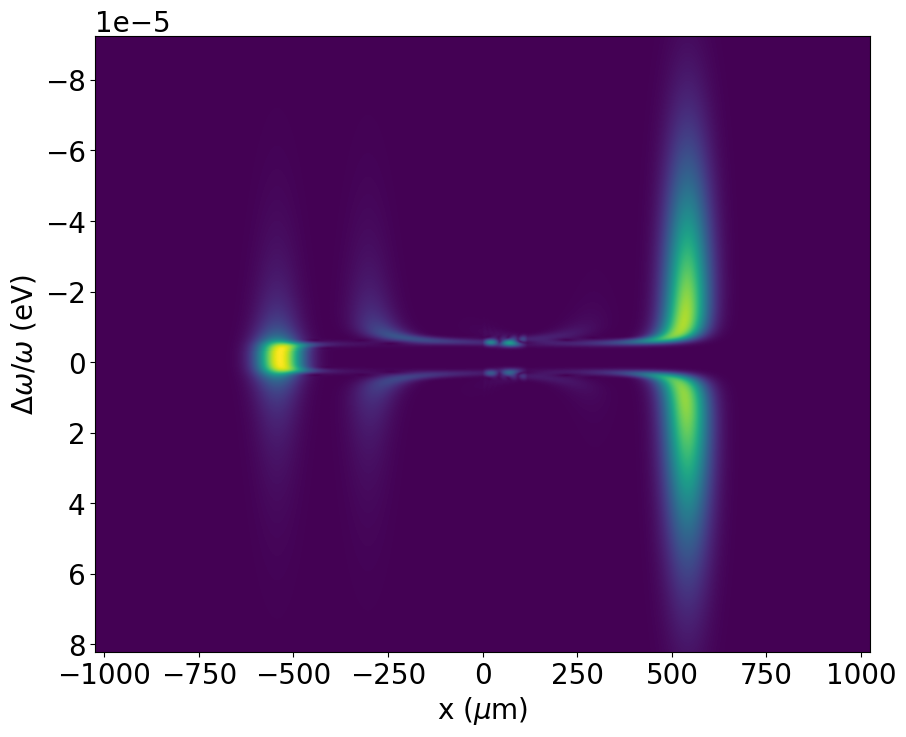

In [9]:
#extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_wxyz[:,:,0,IJ])**1 + np.abs(U2_wxyz[:,:,0,IJ])**1,extent = [-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim)/xcr.omega0-5e-6, np.min(w_sim)/xcr.omega0-5e-6] ,aspect='auto')
plt.xlabel(r'x ($\mu$m)')
plt.ylabel(r'$\Delta \omega/\omega$ (eV)')

#plt.ylim(-2e-5, 2e-5)

In [10]:
U1_wx = U1_wxyz[:, :, 0, :]
U2_wx = U2_wxyz[:, :, 0, :]

U1_tx = np.fft.ifft(U1_wx, axis=0)
U2_tx = np.fft.ifft(U2_wx, axis=0)


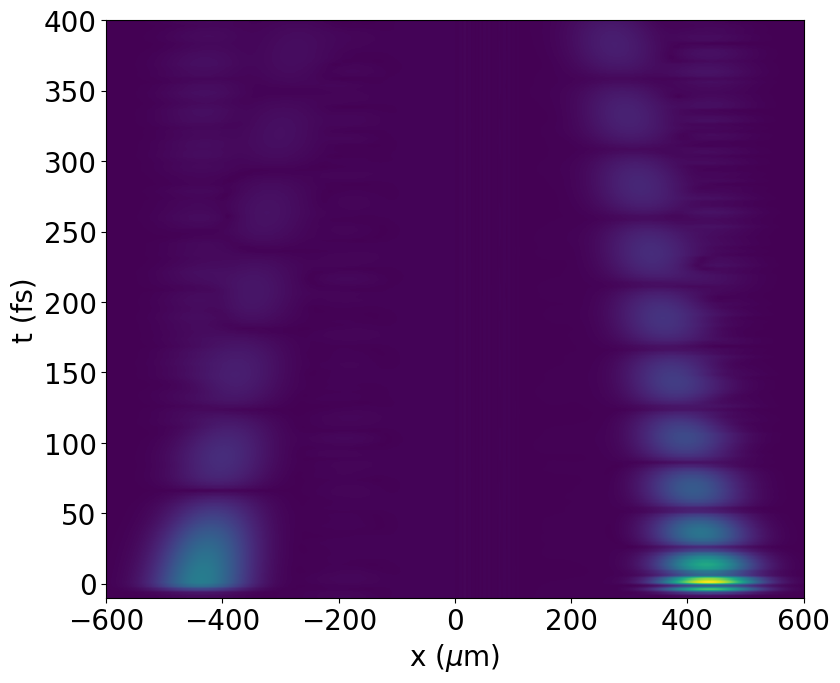

In [11]:
It=130
U1_txIt=U1_tx[:,:,It];
U2_txIt=U2_tx[:,:,It];
plt.figure(figsize=(9,7.5))
plt.imshow(np.abs(U1_txIt*1+U2_txIt*1)**0.6,extent=[-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6 ,0-ntmax*1e15/2,ntmax*1e15/2], aspect='auto')
plt.xlabel(r'x ($\mu$m)')
plt.ylabel(r't (fs)')
plt.ylim(-10,400)
plt.xlim(-600,600)
#plt.grid()
plt.show()

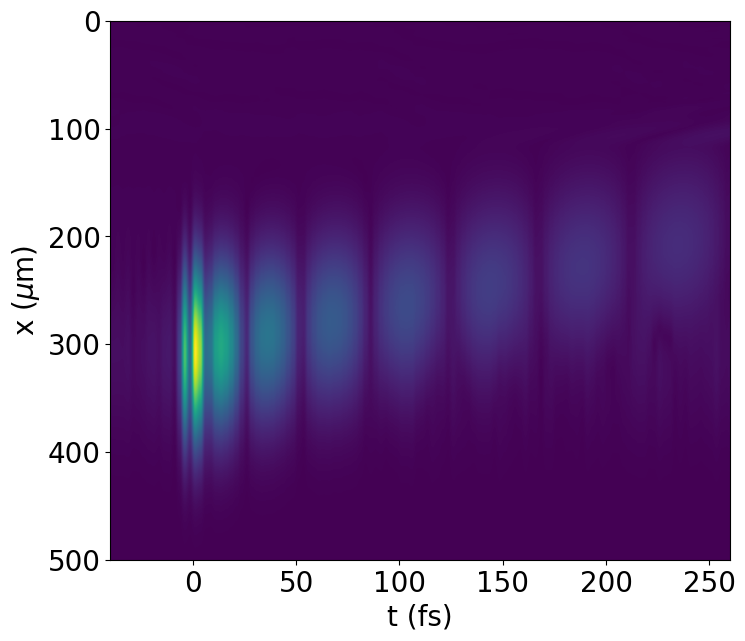

In [12]:
U2_txIt=U2_tx[:,:,105];
UPj=np.abs(U2_txIt*1)**0.6
rUPj=np.rot90(UPj,k=-1)
plt.imshow(rUPj,extent=[0-ntmax*1e15/2,ntmax*1e15/2,xcr.xxmax / xcr.convr * 1e6, -xcr.xxmax / xcr.convr * 1e6],aspect='auto')
plt.ylabel(r'x ($\mu$m)')
plt.xlabel(r't (fs)')
plt.xlim(-40,260)
plt.ylim(500, 0)
plt.show(8,4)